1. DATA COLLECTION

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2. UNDERSTANDING THE DATASET

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


3. STATISTICAL SUMMARY

In [5]:
# total_bill -->x(input)
# tip-->y(output)

df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


4. RELATIONSHIP CHECK

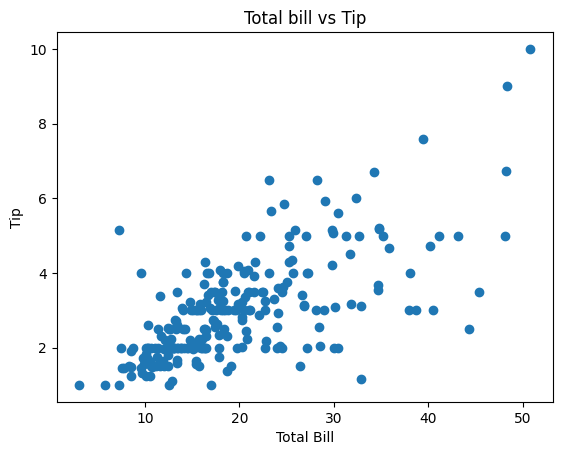

In [6]:
#Before using any model,we must confirm relationship!

import matplotlib.pyplot as plt
plt.scatter(df['total_bill'],df['tip'])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total bill vs Tip")
plt.show()

OBSERVATIONS

1. As the bill increases,tip increases
2. Relationship is a straight line (So,we can use linear regression)


5. FEATURE & TARGET SEPARATION

In [7]:
x=df[['total_bill']] #featured input in the 2D only (input must be in 2D format only)
y=df['tip'] #featured output in 1D

6. Train-Test-Split

why? --> A model must perform well on the unseen data

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#test_size=0.2 means that 80% of the data is for training and the 20% is for the testing
#random_state=42 means that out of 80% of the data random 42 points are chosen for training

7. FEATURE STANDARDIZATION

Why? --> to make the data to be present on the same scale
1. Compare the co-efficients fairly
2. Avoid the Dominance of large values
3. Prepare for the Ridge/Lasso

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


NOTE:

1. fit only on training data
2. Prevents the data leakage

transform--->applied on testing part 

fit_transform--->applied on training part 


8. TRAIN LINEAR REGRESSION MODEL

In [11]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train_scaled,y_train)
print("Co-efficient(m): ",model.coef_[0])
print("Intercept(c): ",model.intercept_)


Co-efficient(m):  0.9357171400271826
Intercept(c):  3.0877948717948724


In [12]:
y_pred=model.predict(x_test_scaled)

9.MODEL EVALUATION

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2=r2_score(y_test,y_pred)
print("R2 Score: ",r2)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE: ",mse)
print("RMSE: ",rmse)

10. VISULALIZE THE BEST FIT LINE

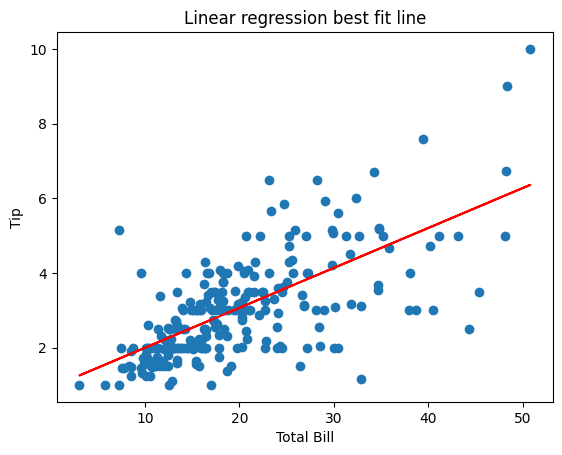

In [ ]:
plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color="red")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear regression best fit line")
plt.show()

11. INPUT-OUTPUT REAL TIME

In [42]:
bill_amount=float(input("Enter the bill amount : "))
bill_scaled=scaler.transform([[bill_amount]])
predict_tip=model.predict(bill_scaled)
print(f"Predicted Tip = {predict_tip[0]: .2f}")


Predicted Tip =  134.66


c:\Users\ashri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
